In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint

initialization  
$
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\LN}[1]{\ln\left\{#1\right\}} 
\newcommand{\P}{\mathbb{P}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\fracone}[1]{\frac{1}{#1}}
\newcommand{\half}{\fracone{2}}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$

$\newcommand{\mat}[1]{
\left[
\begin{matrix}
#1
\end{matrix}
\right]
}
$

$\newcommand{\arrthree}[1]{
\begin{array}{rlr}
#1
\end{array}
}
$

$
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
$

$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$



sum, product
$
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet bold,
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
\newcommand{\ab}{\mathbf{a}}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\Abt}{\Ab^T}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
\newcommand{\Ub}{\mathbf{U}}
$

math bold
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
$

Maximum Likelihood and Linear Regression


Gaussian
========

Univariate Gaussian
----------------------

$$
p(x) =
\fracone{\sqrt{2\pi\sigma^2}}
\exp
\left\{
  -\fracone{2\sigma^2}
  \left(
    x - \mu
  \right)^2
\right\}
~~~ ~~~ ~~~ ~~~ 
x \sim \mathcal{N} \left( \mu, \sigma^2 \right)
$$

Sampling

* sample x from $U(0,1)$
* find $cum^{-1}(x)$

Multivariate
--------------

If $\yb \in \mathbb{R}^n$, then
$$
p(\yb)
=
\left|
  2 \pi \Sigma
\right|^{-1/2}
\exp\left\{
  -\half (\yb-\mub)^T \Sigma^{-1} (\yb-\mub)
\right\}
$$
where
$$
\mub =
\mat{
  \mu_1 \\ \vdots \\ \mu_n
}
=
\mat{
  \E{y_1} \\ \vdots \\ \E{y_n}
}
$$
and
$$
\Sigma = 
\mat{
  \sigma_{11} & \cdots & \sigma_{1n} \\
  \vdots      & \ddots & \vdots      \\
  \sigma_{n1} & \cdots & \sigma_{nn}
}
=
\E{ (\yb-\mub) (\yb-\mub)^T }
$$

Bivariate: Example
-------------------

two independent Gaussian RV's.
$$
x_1 = \mathcal{\mu_1, \sigma^2} ~~~ ~~~ ~~~
x_2 = \mathcal{\mu_2, \sigma^2}
$$

Joint distribution $p(x_1, x_2)$ is:
\begin{array}{rll}
p(x_1, x_2) 
&=
p(x_1) ~p(x_2)
\\ &=
\frac{\EXP{-\fracone{2\sigma^2} (x_1 - \mu_1)^2}}
{(2\pi\sigma^2)^{-1/2}}
\frac{\EXP{-\fracone{2\sigma^2} (x_2- \mu_2)^2}}
{(2\pi\sigma^2)^{-1/2}}
\\ &=
\frac{
\EXP{
-\half
\displaystyle \sum_{i=1}^{2}
\left[
  (x_i - \mu_i)^T (\sigma^2)^{-1} (x_i - \mu_i)
\right]
}
}
{2\pi\sigma^2}
\\ &=
\frac{
\EXP{
-\half
\mat{ (x_2 - \mu_1) & (x_2 - \mu_2) }
\mat{
  \sigma^2 & 0 \\
  0 & \sigma^2
}^{-1}
\mat{ (x_2 - \mu_1) \\ (x_2 - \mu_2) }
}
}
{2\pi\sigma^2}
\end{array}

Sampling from a multivariate
-----------------------------

take the 1D case
$$
y \sim \mathcal{N}(0,\sigma)
\sim \sigma + \mathcal{N}(0, 1)
$$

$$
\arrthree{
y_1 &\sim \mathcal{N}(\mu, \sigma^2) \\
y_2 &\sim \mu + \sigma \mathcal{N}(0, 1) \\
}
$$

Remember the [properties](/notebooks/all-of-statistics/3-expectation.ipynb#Variance)
$$
\arrthree{
\E{X_1 + X_2} &= \E{X_1} + \E{X_2}\\
\E{aX} &= a \E{X}\\
\V{X + a} &= \V{X}\\
\V{aX} &= a^2 \V{X}
}
$$
So
$$
\E{y2} = \E{\mu} + \sigma \E{\mathcal{N}(0,1)} = \mu
\\
\V{y2} = \V{\sigma \mathcal{N}(0,1)} = \sigma^2
$$

Similarly, for the multivariate case,
$$
\underl{x} \sim \mathcal{N}(\underl{\mu}, \Sigma)
$$
Using Cholesky decomposition, $\Sigma = \Bb \Bt$, we have
$$
\underl{x} \sim \underl{\mu} + \Bb \mathcal{N}(0, I)
$$

That is, sample D times from $\mathcal{N}(0,1)$ and form a vector outta it, multiply it by **B** and then add $\underl{\mu}$

Likelihood
============

Example
--------

3 points $y_1 = 1, y_2 = 0.5, y_3 = 1.5$ which are independent and Gaussian with unknown mean $\theta$ and variance 1.

$$
y_i \sim \mathcal{N}(\theta, 1)
=
\theta + \mathcal{N}(0,1)
$$

Likelihood
$$
p(y_1 ~y_2 ~y_3 \mid \theta)
=
p(y_1 \mid \theta) ~p(y_2 \mid \theta) ~p(y_3 \mid \theta)
$$

Consider two guesses of $\theta$, 1 and 2.5. which is more likely?

ofc, $\theta = 1$, since it is more likely.  
Hence, in the light of this, we can define likelihood as the probability of seeing the data $\D$ given the parameters of the model. tat is, the one that explains the data well.

for Linear regression
----------------------

Let
$$
y_i \sim \mathcal{N}(x_i^T \theta, \sigma^2)
= x_i^T + \mathcal{N}(0, \sigma^2)
$$

$$
\arrthree{
p(\yb \mid \Xb, \thetab, \sigma)
&=
\prodiN p(y_i \mid \xb_i \thetab, \sigma)
\\ &=
\prodiN
\left( 2 \pi \sigma^2 \right)^{-1/2}
\EXP{
  -\fracone{2\sigma^2}
  \left( y_i - \xb_i^T \thetab \right)^2
}
\\ &=
\left( 2 \pi \sigma^2 \right)^{-N/2}
\EXP{
  -\fracone{2\sigma^2}
  \sumiN
  \left( y_i - \xb_i^T \thetab \right)^2
}
\\ &=
\left( 2 \pi \sigma^2 \right)^{-N/2}
\EXP{
  -\fracone{2\sigma^2}
  \left( \yb - \Xb \thetab \right)^T
  \left( \yb - \Xb \thetab \right)
}
}
$$

The exponent looks like the least squares objective.

Cost function
-------------

$$
\arrthree{
J(\thetab)
&=
\sumiN \left(y_i - \xb_i^T \thetab \right)^2
\\
p(\yb \mid \Xb, \thetab, \sigma)
&=
\left( 2 \pi \sigma^2 \right)^{-N/2}
\EXP{
  -\fracone{2\sigma^2}
  \sumiN
  \left( y_i - \xb_i^T \thetab \right)^2
}
\\ &=
\prodiN
\left( 2 \pi \sigma^2 \right)^{-1/2}
\EXP{
  -\fracone{2\sigma^2}
  \left( y_i - \xb_i^T \thetab \right)^2
}
}
$$

Max Likelihood
===============

* there is a gaussian (say, of equal variance $\sigma^2$) centered at the $\hat{y}_i = \xb_i^T \thetab$, whose "x" axis is the axis of y or the label to be predicted.
* now, the likelihood of $\xb_i$ is given by $\mathcal{N}(\xb_i \mid \hat{y}_i, \sigma^2)$
* now, lin regression is all about increasing this likelihood for all the points in $\D$
* if the likelihood is increased, then the distance $\Norm{\hat{y}_i - y_i}$ decreases as well
  * if likelihood increases, then the point $x_i$ moves closer to the mean, which in turn means the distance or the error decreases
* the outliers screw up the fit, since the gaussian f tends to move the line closer to the outlier
  * fix: use a [student's t](/notebooks/all-of-statistics/2-random-variables.ipynb#t-Distribution)

ML
---

MLE of $\thetab$ is obtained by taking the derivative of the log-likelihood, $\log p(\yb \mid \Xb, \thetab, \sigma)$. The goal is to maximize the likelihood of seeting the training data **y** by modifying the parameters $(\thetab, \sigma)$.

$$
\arrthree{
p(\yb \mid \Xb, \thetab, \sigma)
&= 
\left( 2 \pi \sigma^2 \right)^{-N/2}
\EXP{
  -\fracone{2\sigma^2}
  \left( \yb - \Xb \thetab \right)^T
  \left( \yb - \Xb \thetab \right)
}
\\
l(\theta)
&=
-\frac{N}{2} \LN{2 \pi \sigma^2}
-\fracone{2\sigma^2}
\left( \yb - \Xb \thetab \right)^T
\left( \yb - \Xb \thetab \right)
}
$$


ML Estimate of $\theta$
---------------------

$$
\arrthree{
\frac{\partial \ln(\theta)}{\partial \thetab}
&=
-\fracone{2\sigma^2}
\left[
  -2 \Xb^T \yb
  + 2 \Xb^T \Xb \thetab
\right]
= 0 
\\
\hat{\thetab}_{ML}
&=
\left( \Xt \Xb \right)^{-1} \Xt \yb
}
$$

same as that was obtained was using Least squares

ML Estimate of $\sigma$
---------------------

$$
\arrthree{
\frac{\partial \ln(\theta)}{\partial \sigma^2}
&=
-\frac{N}{2}
\fracone{\sigma^2}
+
\fracone{2\sigma^4}
\left( \yb - \Xb \thetab \right)^T
\left( \yb - \Xb \thetab \right)
= 0
\\
\sigma^2 &=
\fracone{N}
\left( \yb - \Xb \thetab \right)^T
\left( \yb - \Xb \thetab \right)
\\ &=
\fracone{N}
\sumiN
\left(
  y_i - \xb_i^T \thetab
\right)^2
}
$$

Making Predictions
====================

given training data $\D = (\Xb, \yb)$, for a new input $\xb_{*}$ and known $\sigma^2$ is given by
$$
p(\yb \mid \xb_{*}, \D, \hat{\sigma}^2)
= \G \left( \yb \mid \xb_*^T \thetab_{ML}, \hat{\sigma}^2 \right)
$$

Risk management is all about reducing variance.

Frequentist learning and ML
=============================

* Frequentist learning: assumes that there exists a true model, say, with parameters $\thetab_0$
* The estimate (learned value) will be denoted as $\hat{\thetab}$
* Given $\D = \left\{ \xb_i \right\}_{i=1}^{N}$, we choose the  $\theta$ which has more probability of generating the data. that is,
$$
\hat{\thetab} = \argmax_{\thetab} p(\D \mid \thetab)
$$

Examples
=========

Bernoulli: a model for coins
-------------------------------

great for text data

$$
p(x \mid \theta) = 
\begin{cases}
\theta   & \text{if } x=1 \\
1-\theta & \text{if } x=0\\
\end{cases}
$$
That is,
$$
p(x \mid \theta) = \theta^{x} (1-\theta)^{1-x}
$$

Entropy
-------

measure of uncertainty associated with a random variable. It is defined as,
$$
\Hb(x) =
-\sum_x p(x \mid \theta) \log p(x \mid \theta)
$$

For Bernoulli, entropy is
$$
\arrthree{
\Hb(x) &=
- \displaystyle \sum_{x=0}^{1}
\theta^x (1-\theta)^{1-x}
\log \left[
  \theta^x (1-\theta)^{1-x}
\right]
\\&=
-\left[
  \theta \log \theta + (1-\theta) \log(1-\theta)
\right]
}
$$

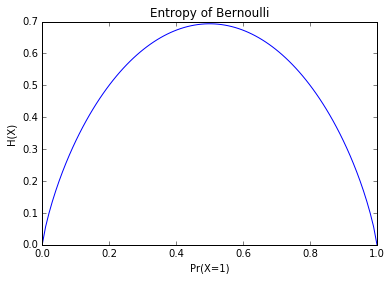

In [6]:
# plotting entropy of bernoulli
x = np.linspace(0+1e-10,1-1e-10,100)
y = [-(1-xx)*math.log(1-xx) - xx*math.log(xx) for xx in x]
plt.plot(x,y)
plt.title('Entropy of Bernoulli')
plt.ylabel('H(X)')
plt.xlabel('Pr(X=1)')
plt.show()

* Entropy of unbiased coin is max, we are completely uncertain about the outcome
* if the coin is biased, close to 0 or 1, then we will have a better idea about the outcome and we will get less information from the occurrence/event.

ML Learning is about reducing the uncertainty about the world

MLE Properties
================

Law of large numbers:  
as $N \rightarrow \infty$, the sample average tends to expectation

$$
\arrthree{
\hat{\mathbb{E}}[X] &= \fracone{N} \sumiN \xb_i & \commentgray{for small N}
\\
\E{X} &= \int \xb p(\xb) ~d\xb & \commentgray{for large N}
}
$$
when $\xb_i \sim p(\xb)$

for iid data from $p(x \mid \thetab_0)$, MLE minimizes the KL divergence:

$$
\arrthree{
\hat{\thetab} &=
\argmax_{\thetab} \prodiN p(\xb_i \mid \thetab)
\\ &=
\argmax_{\thetab} \sumiN \log p(\xb_i \mid \thetab)
\\ &=
\argmax_{\thetab}
\fracone{N} \sumiN \log(p(\xb_i \mid \thetab))
-
\fracone{N} \sumiN \log(p(\xb_i \mid \thetab_o))
\\ &=
\argmax_{\thetab}
\fracone{N} \sumiN \log
\left(
 \frac{p(\xb_i \mid \thetab)}{p(\xb_i \mid \thetab_o)}
\right)
\\ & \xrightarrow{N \rightarrow \infty}
\argmin_{\thetab}
\int
\log
\left(
 \frac{p(\xb \mid \thetab)}{p(\xb \mid \thetab_o)}
\right)
p(\xb \mid \thetab_0) ~d\xb
\\
}
$$
This is KL Divergence

Here, we assumed $\xb_i \sim p(\xb \mid \thetab_0)$. why do we do that? coz $\thetab_0$ is the true model in frequentist paradigm

$$
\argmin_{\thetab}
\int
\log
\left(
 \frac{p(\xb \mid \thetab)}{p(\xb \mid \thetab_o)}
\right)
p(\xb \mid \thetab_0) ~d\xb
\\
\argmin_{\thetab}
\underbrace{
\int p(\xb \mid \thetab_0)
\log p(\xb \mid \thetab_0) ~dx
}_{\text{information world}}
-
\underbrace{
\int p(\xb \mid \thetab_0)
\log p(\xb \mid \thetab) ~dx
}_{\text{in model}}
$$

* if the information in the real world matches the information in my model, then we have achieved the true minimum.
* First term: negative entropy or information
* Second term: cross entropy

theoretical statistics  
by alex wishart, ruben zumar

under smoothness and identifiability assumptions, the MLE is consistent:
$$
\arrthree{
\hat{\thetab} &\xrightarrow{p} \thetab_0
\\
plim(\hat{\thetab}) &= \thetab_0
\\
\Lim{N \rightarrow \infty}
p( \left| \hat{\thetab} - \thetab_0 \right| > \alpha) &\rightarrow 0
} 
$$
All the three formulations are equivalent and can be used interchangeably 

* MLE is asymptotically normal
* as $N \rightarrow \infty$, we have:
$$
(\hat{\thetab} - \thetab_0) \Rightarrow \mathcal{N}(0, I^{-1})
$$
where I is the fisher information matrix.
from All of statistics

* It is asymptotically optimal or efficient.
* asymptotically, it has the lowerst vriance among all well behaved estimators.
* attains a lower bound on the CLT variance known as the Cramer-Rao lower bound
* is MLE always the right option?

* But only for $N \rightarrow \infty$
* problems posed in this setting tend to be intracable
* belong to NP Hard or #P complete

Bias and Variance
=================

* estimator is a function of the data $\hat{\thetab} = g(\D)$
$$
\text{Bias}(\hat{\thetab}) = \mathbb{E}_{\D \mid \thetab_0}(\hat{\thetab}) - \thetab_0 = \bar{\thetab} - \thetab_0
$$

$\bar{\thetab}$ is the average of all the estimates for $\thetab$ for different data sets $\D$ sampled from the model given by $\thetab_0$
$$
\bar{\thetab} = \int \hat{\thetab} ~p(\D \mid \thetab_0) ~d\D
$$

random forests used in kinect, lotta estimators which have a large variance and then average the estimates from these and you will get an estimate close to the true value

Variance is
$$
\V{\hat{\thetab}}
=
\mathbb{E}_{p(\D \mid \thetab_0)}(\hat{\thetab} - \bar{\thetab})^2
$$

MSE is
$$
\mathbb{E}_{p(\D \mid \thetab_0)}(\hat{\thetab} - \bar{\thetab})^2
=
\left(
  \bar{\thetab} - \thetab_0
\right)^2
+
\mathbb{E}_{p(\D \mid \thetab_0)}(\hat{\thetab} - \bar{\thetab})^2
$$